In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from millify import millify


plt.rc('font', size=15)
plt.style.use('dark_background')

- total confirmed cases
- total deaths
- (total active/recovered)
- total vaccinations
- Recovered numbers is actually kind of unclear (maybe more sense when "active" cases are considered) > > no reliable data


# Time series data

In [2]:
# dfs = [read (from string list)]
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
csv_url = "time_series_covid19_confirmed_global.csv"
dfc = pd.read_csv(url + csv_url, parse_dates=True)  # infection data

csv_url = "time_series_covid19_deaths_global.csv"
dfd = pd.read_csv(url + csv_url, parse_dates=True)  # deaths

ts_min = 4  # measurements begin
t = dfc.columns.tolist()[ts_min:]

print("Current date", t[-1])

Current date 1/26/22


In [3]:
# infections
dfc = dfc.rename(columns={
    "Country/Region" : "country",
    "Province/State" : "state"}
)
dfc = dfc.groupby(by="country").sum()
dfc = dfc.reset_index()

# deaths
dfd = dfd.rename(columns={
    "Country/Region" : "country",
    "Province/State" : "state"}
)
dfd = dfd.groupby(by="country").sum()
dfd = dfd.reset_index()


In [14]:
#conf = np.round(dfc.loc[:, t[-1]].sum() / 1e6, denom)
conf = dfc.loc[:, t[-1]].sum()
dconf = dfc.loc[:, t[-1]].sum() - dfc.loc[:, t[-2]].sum()

deaths = dfd.loc[:, t[-1]].sum()
ddeaths = dfd.loc[:, t[-1]].sum() - dfd.loc[:, t[-2]].sum()

print(millify(conf, precision=2), millify(dconf, precision=2))
print(millify(deaths, precision=2), millify(ddeaths, precision=2))

362.55M 3.77M
5.63M 10.89k


- rolling works but is sloooooow > its the .T trnaspose > transpose() is better and have to cast to numpy for speed

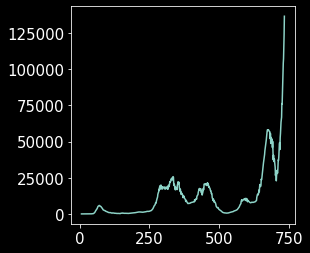

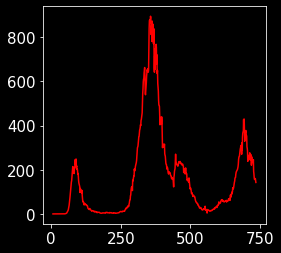

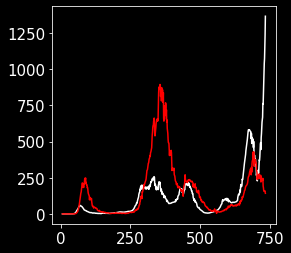

In [40]:
ccountry = "Germany"
idx = dfc[dfc.country == ccountry].index.tolist()
y = np.squeeze(dfc.loc[idx, t].diff(axis=1).transpose().rolling(window=7).mean())
y = np.array(y)

plt.figure(figsize=(4,4))
plt.plot(y)

y2 = np.squeeze(dfd.loc[idx, t].diff(axis=1).transpose().rolling(window=7).mean())
y2 = np.array(y2)

plt.figure(figsize=(4,4))
plt.plot(y2, "-r")

plt.figure(figsize=(4,4))
plt.plot(y / 100, "-w")
plt.plot(y2, "-r")

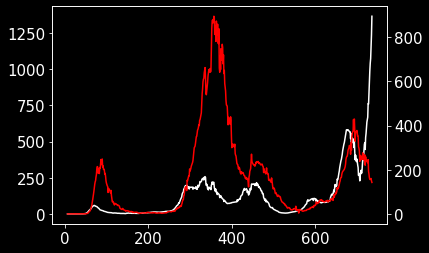

In [42]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(y / 100, 'w-')
ax2.plot(y2, 'r-')

# Mark the begiining of the vaccination campaign in plot

#ax1.set_xlabel('X data')
#ax1.set_ylabel('Y1 data', color='g')
#ax2.set_ylabel('Y2 data', color='b')

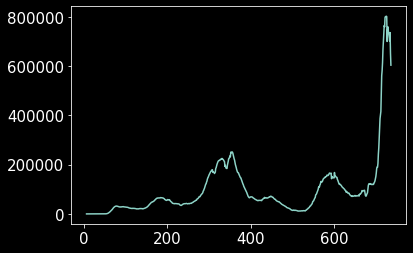

In [37]:
ccountry = "US"
idx = dfc[dfc.country == ccountry].index.tolist()
y = np.squeeze(dfc.loc[idx, t].diff(axis=1).transpose().rolling(window=7).mean())
y = np.array(y)
plt.plot(y)

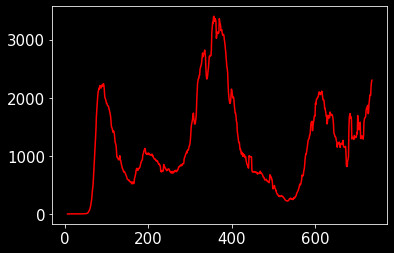

In [38]:
y2 = np.squeeze(dfd.loc[idx, t].diff(axis=1).transpose().rolling(window=7).mean())
y2 = np.array(y2)
plt.plot(y2, "-r")

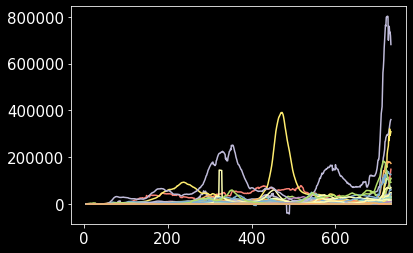

In [38]:
#plt.plot(x1.values);
plt.plot(x2.values);

In [ ]:
# country idx
dfg = dfg.reset_index()
idx = dfg[dfg.country == "Germany"].index.tolist()
y = np.squeeze(dfg.loc[idx, t].values)

plt.figure(figsize=(11,5))
plt.subplot(121)
plt.suptitle("Corona Germany")

plt.plot(y, lw=2)
plt.xlabel("Recorded days")
plt.ylabel("Accumulated corona cases in Germany")

prev = 28 # previous days to show
y2 = y / 10
y2 = y[-prev:]
x2 = t[-prev+1:]  # have same n_elem as y

plt.subplot(122)
plt.bar(x2, np.diff(y2), color="w")
plt.xlabel("Previous days")
plt.ylabel("Daily corona cases in Germany")
plt.xticks(rotation=90);
plt.tight_layout()